## Telecom Company Plans Recommendation System
Ali Alkhalaf


---



#objective
The aim of this project is to recommend a subscription plan to new customers of the Teleco Company
This project will help the company to best run its plans’ marketing campaign and target the right customers


---



Importing the required packagies


---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

le = LabelEncoder()

sns.set()

Reading the dataset using Pandas


---



In [2]:
df1 = pd.read_csv("customer_churn.csv")
df1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


Data Exploration

---



In [22]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
df1.info

<bound method DataFrame.info of       customerID  gender        SeniorCitizen         Partner  \
0     7590-VHVEG  Female  Not a SeniorCitizen   Has a Partner   
1     5575-GNVDE    Male  Not a SeniorCitizen  Has no Partner   
2     3668-QPYBK    Male  Not a SeniorCitizen  Has no Partner   
3     7795-CFOCW    Male  Not a SeniorCitizen  Has no Partner   
4     9237-HQITU  Female  Not a SeniorCitizen  Has no Partner   
...          ...     ...                  ...             ...   
7038  6840-RESVB    Male  Not a SeniorCitizen   Has a Partner   
7039  2234-XADUH  Female  Not a SeniorCitizen   Has a Partner   
7040  4801-JZAZL  Female  Not a SeniorCitizen   Has a Partner   
7041  8361-LTMKD    Male        SeniorCitizen   Has a Partner   
7042  3186-AJIEK    Male  Not a SeniorCitizen  Has no Partner   

             Dependents  tenure PhoneService     MultipleLines  \
0     Has no Dependents       1           No  No phone service   
1     Has no Dependents      34          Yes           

In [26]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Data Demographics Visualization


---



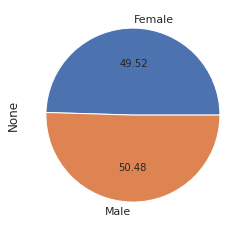

In [3]:
df1.groupby('gender').size().plot(kind='pie', autopct='%.2f')

Encoding SeniorCitizen into tow categories:  

*   The 0 to be Not a SeniorCitizen.
*   The 1 to be a SeniorCitizen.

Then plot this column using a pie chart


---



In [5]:
df1['SeniorCitizen'].replace([0], 'Not a SeniorCitizen', inplace=True)
df1['SeniorCitizen'].replace([1], 'SeniorCitizen', inplace=True)

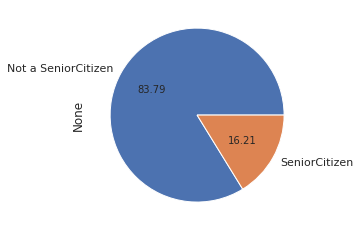

In [6]:
df1.groupby('SeniorCitizen').size().plot(kind='pie', autopct='%.2f')

Encoding Partner into tow categories:  

*   The 0 to be Has no partner
*   The 1 to be Has partner

Then plot this column using a pie chart


---



In [7]:
df1['Partner'].replace(['Yes'], 'Has a Partner', inplace=True)
df1['Partner'].replace(['No'], 'Has no Partner', inplace=True)

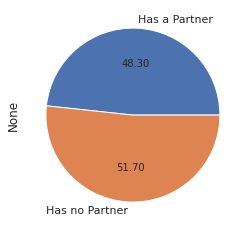

In [8]:
df1.groupby('Partner').size().plot(kind='pie', autopct='%.2f')

Encoding Dependents into tow categories:  

*   The 0 to be Has no Dependents
*   The 1 to be Has Dependents

Then plot this column using a pie chart


---



In [9]:
df1['Dependents'].replace(['Yes'], 'Has Dependents', inplace=True)
df1['Dependents'].replace(['No'], 'Has no Dependents', inplace=True)


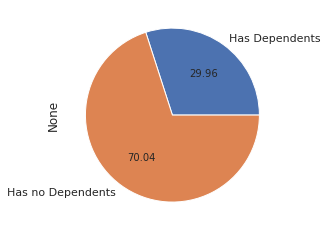

In [10]:
df1.groupby('Dependents').size().plot(kind='pie', autopct='%.2f')

In [ ]:
df5 = pd.read_csv("teleco_customers_P7.csv")
df5.head(3)

Plot the plans into a pie chart. We have tow plans:


*   Plan A: has all the services
*   Plan B: has only a phone service


---





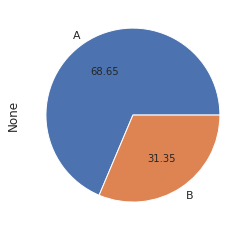

In [13]:
df5.groupby('Plan').size().plot(kind='pie', autopct='%.2f')

In [15]:
df = pd.read_csv("teleco_customers_P71.csv")

In [16]:
df.shape

(7043, 5)

In [19]:
df.head()

,gender,SenioCitizen,Partner,Dependents,Plan
0,0,0,1,0,B
1,1,0,0,0,A
2,1,0,0,0,A
3,1,0,0,0,B
4,0,0,0,0,A


Encoding the Plan coulmn so plan A will be 0 and plan B will be 1


---



In [20]:
df['Plan'] = le.fit_transform(df['Plan'])
df.head(3)

,gender,SenioCitizen,Partner,Dependents,Plan
0,0,0,1,0,1
1,1,0,0,0,0
2,1,0,0,0,0


In [96]:
df.head(3)

,gender,SenioCitizen,Partner,Dependents,Plan
0,0,0,1,0,1
1,1,0,0,0,0
2,1,0,0,0,0


In [97]:
corr = df.corr()

## Heatmap Correlation


---



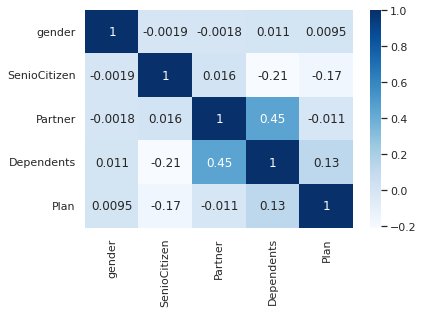

In [100]:
sns.heatmap(corr, cmap="Blues", annot=True)

## Split data into test and train sets


---



In [13]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Plan'])
y = df['Plan']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)
X_train_strat, x_test, y_train_strat, y_test = train_test_split(x,y,test_size=0.20)


In [14]:
X_train_strat.shape

(5634, 4)

In [15]:
x_test.shape

(1409, 4)

## Logistic Regression


---



In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [17]:
model.fit(X_train_strat, y_train_strat)

LogisticRegression()

In [18]:
print("Accuracy:", model.score(x_test, y_test) *100)

Accuracy: 70.54648687012065


## KNN


---



In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [20]:
model.fit(X_train_strat, y_train_strat)

KNeighborsClassifier()

In [21]:
print("Accuracy:", model.score(x_test, y_test) *100)

Accuracy: 60.2555003548616


## Decision Tree


---



In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [23]:
model.fit(X_train_strat, y_train_strat)

DecisionTreeClassifier()

In [24]:
print("Accuracy:", model.score(x_test, y_test) *100)

Accuracy: 69.55287437899219


## Tensorflow


---



In [25]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(4,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_strat, y_train_strat, epochs=100)

Epoch 1/100
177/177 [==============================] - 1s 2ms/step - loss: 0.6750 - accuracy: 0.5751
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.6812
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.6818
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.6818
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.6818
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.6818
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 0.6080 - accuracy: 0.6818
Epoch 8/100
177/177 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.6818
Epoch 9/100
177/177 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.6818
Epoch 10/100
177/177 [==============================] - 0s 2ms/step - loss: 0.6053 - accura

In [26]:
model.evaluate(x_test, y_test)

45/45 [==============================] - 0s 1ms/step - loss: 0.5901 - accuracy: 0.6955


[0.5900917053222656, 0.6955287456512451]

In [27]:
yp = model.predict(x_test)

In [28]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

##Precision, Recall, and F1-Score


---



In [29]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82       994
           1       0.33      0.03      0.06       415

    accuracy                           0.70      1409
   macro avg       0.52      0.50      0.44      1409
weighted avg       0.59      0.70      0.59      1409



## Confusion matrix


---

*italicized text*

Text(66.5, 0.5, 'Truth')

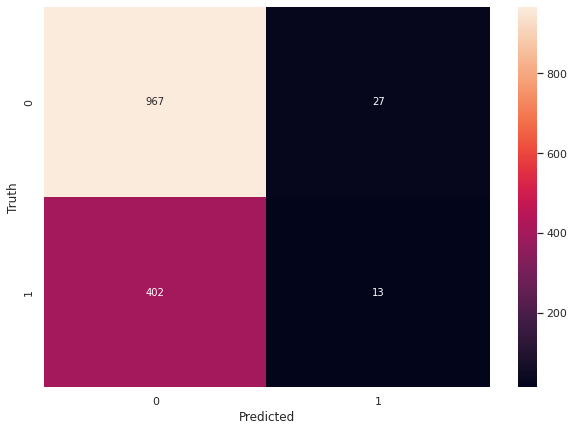

In [30]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')